<h1><span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Pytorch-기초" data-toc-modified-id="Pytorch-기초-1">Pytorch 기초</a></span></li><li><span><a href="#Pytorch-패키지의-기본-구성" data-toc-modified-id="Pytorch-패키지의-기본-구성-2">Pytorch 패키지의 기본 구성</a></span></li><li><span><a href="#텐서-그림으로-이해하기" data-toc-modified-id="텐서-그림으로-이해하기-3">텐서 그림으로 이해하기</a></span></li><li><span><a href="#2D-Tensor" data-toc-modified-id="2D-Tensor-4">2D Tensor</a></span></li><li><span><a href="#3D-Tensor---이미지" data-toc-modified-id="3D-Tensor---이미지-5">3D Tensor - 이미지</a></span></li><li><span><a href="#3D-Tensor---텍스트" data-toc-modified-id="3D-Tensor---텍스트-6">3D Tensor - 텍스트</a></span></li></ul></div>

출처 : https://github.com/Namsik-Yoon/pytorch_basic/blob/master/1.%20pytorch%20%EA%B8%B0%EC%B4%88.ipynb 에서 몰래 가져왔다. 필사를 필사적으로 해보자.

# Pytorch 기초

기본적으로 pytorch(gpu) 및 기초 라이브러리가 깔려있고 기본적인 딥러닝 지식이 있다는 가정하에 진행한다는데 나는 그런게 없다.

# Pytorch 패키지의 기본 구성

In [2]:
"""
1. pytorch
메인 네임스페이스입니다.
텐서 등의 다양한 수학 함수가 포함되어 있으며 Numpy와 유사한 구조(함수명들이 거의 똑같음)를 가집니다.

네임스페이스가 뭘까? 군대가기전에 C언어 배울 때 네임스페이스라고 들었던 거 같은데... 기억이 안난다.
"""
import torch

pytorch가 안 깔려 있으면 https://pytorch.org/get-started/locally/ 여기서 깔아보자.

In [3]:
"""
2. torch.autograd
자동 미분을 위한 함수들이 포함되어 있다.
자동 미분의 on/off를 제어하는 콘텍스트 매니저(enable_grad/no_grad)나
자체 미분 가능 함수를 정의할 때 사용하는 기반 클래스인 'Function' 등이 포함되어져 있다.

자동 미분은 알겠는데 콘텍스트 매니저는 잘 모르겠다. no_grad는 어디서 본거 같다.
"""
import torch.autograd

In [4]:
"""
3. torch.nn
신경망을 구축하기 위한 다양한 데이터 구조와 레이어가 정의되어져 있다.
예를 들어, CNN, RNN, LSTM과 같은 레이어, ReLU와 같은 활성화 함수, MSELoss와 같은 손실 함수가 있다.

torch 안 사용하면 numpy로 구현해서 써야한다해서 바로 torch 설치 했다.
"""
import torch.nn

In [5]:
"""
4. torch.optim
확률적 경사 하강법(Stochastic Gradient Descent, SGD)를 중심으로 한
파라미터 최적화 알고리즘이 구현되어 있다.

SGD 약자 구글에 검색해봤다. 비밀이다.
"""
import torch.optim

In [6]:
"""
5. torch.utils.data
SGD의 반복 연산을 실행할 때 사용하는 미니 배치용 유틸리티 함수가 포함되어 있다.

이게 이런 의미인지 처음 알았다.
"""
import torch.utils.data

In [7]:
"""
6. torch.onnx
ONNX(Open Neural Network Exchange)의 포맷으로 모델을 export할 때 사용한다.
ONNX는 서로 다른 딥러닝 프레임워크 간 모델을 공유할 때 사용한다.(사용해본 적 없다.)

나도 사용해본 적 없는데 사용해야 할 것 같다.
"""
import torch.onnx

# 텐서 그림으로 이해하기

벡터, 행렬, 텐서의 개념에 대해서 이해하고, Numpy와 파이토치로 벡터, 행렬, 텐서를 다루는 방법을 이해하자.

![image.png](https://wikidocs.net/images/page/52460/tensor1.PNG)
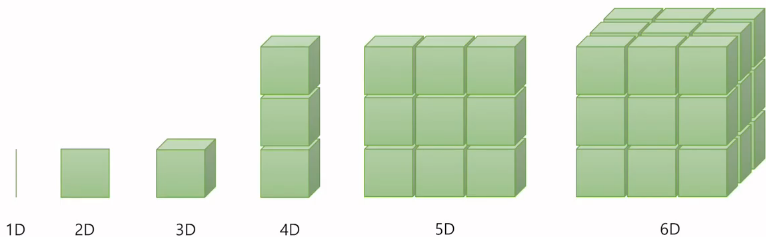

차원이 없는 값을 스칼라 (위 그림에 없음)

1차원으로 구성된 값을 벡터 (위 그림 중 1D)

2차원으로 구성된 값을 행렬 (위 그림 중 2D)

3차원으로 구성된 값을 텐서 (위 그림 중 3D)

4차원 이상부터는 머리로 생각하기 어렵다. 나는 왜 영화 인터스텔라 주인공 아저씨가 생각날까

4, 5, 6차원은 텐서를 쌓아 올린 것으로 보자.

근데 벡터나 행렬도 각각 1차원 텐서, 2차원 텐서로 표현하기도 한다.

이제 다 텐서라고 부르자

# 2D Tensor

딥러닝을 할 때 다루고 있는 데이터의 형태가 중요하다. 텐서의 크기를 고려해야 한다. 

다음은 봐도 봐도 잊어버리는 그림이다. 이번엔 꼭 기억하자

|t| = (Batch size, dim)

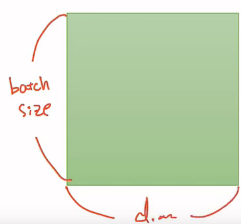

2차원 텐서의 행의 크기를 batch size, 열의 크기를 dimension으로 표현했다.

훈련 데이터 하나의 크기를 256이라고 해보자. [3, 1, 2, 5, ...] 이런 숫자들의 나열이 256의 길이로 있다.

훈련 데이터 하나는 벡터의 차원이 256개 있는 것이다. 행렬 표현으로 1X256 이다.

만약 이런 훈련 데이터의 개수가 3000개라고 한다면, 전체 현재 데이터의 크기는 3000 * 256 이다.

컴퓨터는 훈련 데이터를 어떻게 처리할까? 컴퓨터는 보통 덩어리로 처리한다. 3000개에서 64개씩 꺼내서 처리한다고 하면

컴퓨터가 한 번에 처리하는 2차원 텐서의 크기는 (batch size * dim) = 64 * 256 이다.

In [9]:
"""
2D Tensor 예시
iris dataset
"""
from sklearn.datasets import load_iris

iris = load_iris()
print(iris.data.shape)

(150, 4)


iris dataset에는 150 X 4짜리 데이터가 있다.

10개만 가져와서 눈으로 봐보자

In [17]:
iris['data'][:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

iris dataset는 2차원 텐서이다.

텐서의 크기는 (batch size * dim) = 10 * 4 이다.

# 3D Tensor - 이미지

데이터의 형태가 이미지면 어떨까. 이미지는 가로와 세로가 있다. 그리고 여러 장이 있을 수도 있다.

데이터의 형태를 그림으로 나타내면 아래와 같다.

|t| = (batch size, width, height)

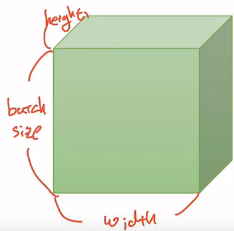

위 그림의 세로는 이미지의 장 수 batch size, 가로는 너비 width, 안쪽으로는 높이 height가 된다.

이번에도 기억하긴 글렀다. 졸리다.

In [24]:
"""
3D Tensor 이미지 예시
digits(mnist와 비슷한 데이터) dataset
"""
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

mnist = load_digits()
print(mnist['images'].shape)

(1797, 8, 8)


disits dataset에는 1797 X 8 X 8 짜리 데이터가 있다.

0을 나타내는 이미지를 가져와서 눈으로 봐보자

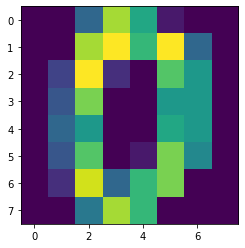

In [23]:
plt.imshow(mnist['images'][0])
plt.show()

digits dataset는 3차원 텐서이다.

텐서의 크기는 (batch size * width * height) = 1797 * 8 * 8 이다.

위의 그림은 8 * 8 짜리 이미지고 이 이미지가 1797개 있는 dataset 이다.

여기가 항상 헷갈렸다. 잊지말자

# 3D Tensor - 텍스트

데이터의 형태가 텍스트면 어떨까. 

그림으로 나타내면 아래와 같다.

|t| = (batch size, length, dim)

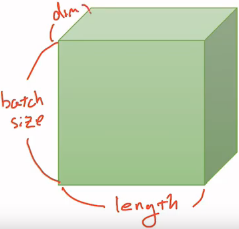

위 그림의 세로는 batch size, 가로는 문장이 길이 length, 안쪽으로는 단어 벡터의 차원 dim이 된다.

텍스트는 재미가 없다.

In [26]:
"""
3D Tensor 텍스트 예시
"""
sentences = ['나는 사과를 좋아해', '나는 바나나를 좋아해', '나는 사과를 싫어해', '나는 바나나를 싫어해']
word_sentences = [x.split(' ') for x in sentences]
print(word_sentences)

[['나는', '사과를', '좋아해'], ['나는', '바나나를', '좋아해'], ['나는', '사과를', '싫어해'], ['나는', '바나나를', '싫어해']]


컴퓨터는 '나는 사과를 좋아해'가 몇 단어인지 모른다. 그래서 단어별로 나눈거다.

In [34]:
my_bow = {'나는':[0.1, 0.2, 0.9],'사과를':[0.3, 0.5, 0.1],'좋아해':[0.3, 0.5, 0.2],'바나나를':[0.7, 0.6, 0.5],'싫어해':[0.5, 0.6, 0.7]}
word2vec = [[my_bow[word] for word in sentence] for sentence in word_sentences]
print(word2vec)
numpy.array(word2vec).shape

[[[0.1, 0.2, 0.9], [0.3, 0.5, 0.1], [0.3, 0.5, 0.2]], [[0.1, 0.2, 0.9], [0.7, 0.6, 0.5], [0.3, 0.5, 0.2]], [[0.1, 0.2, 0.9], [0.3, 0.5, 0.1], [0.5, 0.6, 0.7]], [[0.1, 0.2, 0.9], [0.7, 0.6, 0.5], [0.5, 0.6, 0.7]]]


(4, 3, 3)

텐서의 크기는 (batch size * length * dim) = 4 * 3 * 3 이다.

텍스트를 하니 이미지를 까먹었다. 오늘은 여기까지